In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import ExtremeLearningMAchine as elm
import itertools
import datacontrol

In [12]:
models = [[2000, 2000]]
alpha = np.linspace(0.01,0.5,200)
activation = ["relu"]
TrainingData = datacontrol.readFile("../data/Development.csv")
X, Y = datacontrol.divide(TrainingData)

In [13]:
results = []
for i in itertools.product(models, alpha, activation):
    print(i)
    ellm = elm.elm(NetworArchitecture = i[0], activation = i[2] ,alpha = i[1])
    val, train = ellm.trainCV(X, Y)
    results.append([*val, *train, i[0], i[1], i[2]])

([2000, 2000], 0.01, 'relu')


KeyboardInterrupt: 

In [128]:
newresults = []
for i in results:
    newresults.append([np.mean(np.array(i[:4])),np.mean(np.array(i[5:9])),np.std(np.array(i[:4])),  i[10], i[11], i[12]])
df = pd.DataFrame(newresults)

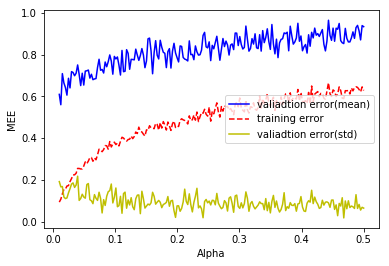

In [130]:
import matplotlib.pyplot as plt
plt.plot(df[4], df[0], '-b', label='valiadtion error(mean)')
plt.plot(df[4], df[1], '--r', label='training error')
plt.plot(df[4], df[2], '-y', label='valiadtion error(std)')
plt.xlabel("Alpha")
plt.ylabel("MEE")
plt.legend(loc = 'center right')

In [108]:
newresults = []
for i in results:
    newresults.append([np.mean(np.array(i[:4])),np.mean(np.array(i[5:9])),  i[10], i[11], i[12]])
df = pd.DataFrame(newresults)

In [110]:
df.to_csv("DIO.csv")

In [114]:
df = pd.read_csv("DIO.csv")

In [33]:
ddf = pd.read_csv("CSVResult/ELMalpha_neurons_funciton.csv")
ddf = ddf.loc[ddf["4"] == "relu"]

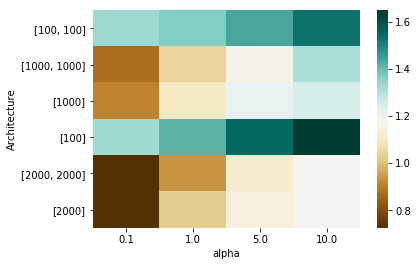

In [123]:
df = pd.read_csv("DIO.csv")
df = df.rename(index=str, columns={"0": "mean Validation Error", "2": "Architecture", "3":"alpha"})
df = df.loc[df["4"] == "relu"]
df = df.pivot("Architecture", "alpha", "mean Validation Error")
ax = sns.heatmap(df, cmap="BrBG")

In [18]:
import datacontrol
import numpy as np
import pandas as pd
import seaborn as sns
import ExtremeLearningMAchine as elm
import itertools
from sklearn.model_selection import train_test_split
ellm = elm.elm(NetworArchitecture = [2000,2000], activation = "relu" ,alpha = 0.1)
TrainingData = datacontrol.readFile("../data/ML-CUP18-TR.csv")
X, Y = datacontrol.divide(TrainingData)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

In [19]:
ellm.fit(X_train, y_train)

In [20]:
Y = ellm.predict(X_test)

In [134]:
Y = np.array(Y)

In [16]:
import validation

In [21]:
validation.MeanEuclidianError(Y, y_test)

0.7643163649478559

In [70]:
y_test.shape

(305, 2)

In [68]:
Y = np.array(Y)

In [69]:
Y.shape

(305, 2)

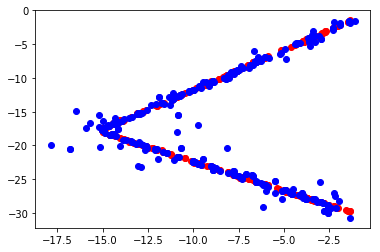

In [14]:
import matplotlib.pyplot as plt
plt.plot(y_test[:, 0], y_test[:,1], "ro")
plt.plot(Y[:, 0], Y[:,1], "bo")

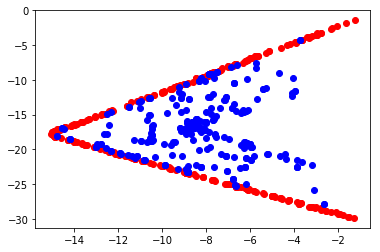

In [10]:
import matplotlib.pyplot as plt
plt.plot(y_test[:, 0], y_test[:,1], "ro")
plt.plot(Y_2[:, 0], Y_2[:,1], "bo")


In [1]:
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
svr = svm.SVR(kernel="rbf", gamma=0.3, C=17, epsilon=0.01)
SVRegressor = MultiOutputRegressor(svr, n_jobs=8)
SVRegressor.fit(X_train, y_train)
Y_2 = SVRegressor.predict(X_test)

NameError: name 'X_train' is not defined

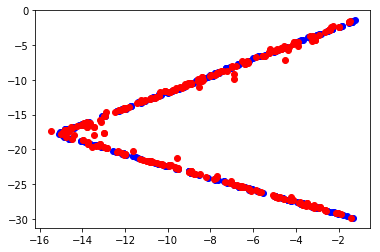

In [13]:
import matplotlib.pyplot as plt
plt.plot(y_test[:, 0], y_test[:,1], "bo")
plt.plot(Y_2[:, 0], Y_2[:,1], "ro")
